In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("Библиотеки загружены успешно!")

Библиотеки загружены успешно!


In [33]:
# Полный список позитивных фраз (С УСИЛЕНИЕМ СЛОВА "ЖИЗНЬ")
true_text_content = """Думайте позитивно и верьте в свою способность достигать отличных результатов.
Вы — лучший ответ на проблемы, которые возникли в понедельник.
Если вы смогли в понедельник подняться с постели, значит вы супер герой.
Твои утренние мысли в понедельник задают тон всей твоей неделе.
Живи так чтобы увидеть, как ты становишься сильнее и живешь счастливой жизнью.
Не позволяйте утренним проблемам помешать вам быть успешным.
Тяжелые времена часто приводят к величайшим моментам вашей жизни.
Продолжайте двигаться вперед.
Трудности в конце концов создают сильных людей.
Независимо через что вы проходите, в конце туннеля есть свет.
Может показаться, что добраться до него сложно, но вы сможете сделать это.
Чем больше вы настроены позитивно, тем больше вы строите для себя эту реальность.
Принятие позитивного отношения ко всему происходящему может творить чудеса.
Хорошее настроение добавляет годы к вашей жизни.
Природные способности важны, но вы можете многого достичь целеустремленностью.
Окружите себя позитивными людьми, которые верят в ваши мечты.
Оставайся позитивным всегда.
Прости других, инвестируй в себя, доверяй своим инстинктам.
Не позволяй другим испортить твой день.
Делай вещи, которые приносят тебе радость.
Люби себя таким, какой ты есть.
Иногда лучшее, что ты можешь сделать — это просто дышать и верить.
Верь, что все получится к лучшему.
Не просто учись, а приобретай опыт.
Не просто меняйся, а трансформируйся.
Не обещай, а докажи делом.
Не критикуй, а поощряй других.
Не просто мечтай, а действуй.
Преданность, вера и позитивное отношение приводят к успеху.
Выбор позитивного настроя определит вашу жизнь.
Жизнь заключается в том, чтобы быть позитивным и радостным.
Вы можете сделать позитивный выбор на всю оставшуюся жизнь.
Не тратьте время на гнев и сожаления.
Жизнь слишком коротка, чтобы быть несчастным.
Всегда верьте в себя и выходите за пределы возможностей.
Ваша жизнь стоит намного больше, чем вы думаете.
У вас больше потенциала, чем вам кажется.
Живи каждый день так, словно твоя жизнь только началась.
Если вы посмотрите на жизнь позитивно, произойдут хорошие вещи.
Жизнь становится легче, когда мы видим добро в людях.
Я беру негатив и превращаю его в позитив.
Держись за свои мечты и реализуй их.
Вы не можете жить позитивной жизнью с негативным умом.
Мы все можем привнести позитивную энергию в этот мир.
Улыбайтесь чаще и звоните друзьям.
Чем меньше вы реагируете на негатив, тем лучше ваша жизнь.
Когда вы контролируете отношение, вы контролируете жизнь.
Сфокусируйтесь на своих сильных сторонах.
Сосредоточьтесь на благословениях, а не на несчастьях.
Будьте позитивны с каждой идеей.
Подойдите к будущему с оптимизмом.
Вы уникальны и у вас есть талант.
Вам не нужно всегда идти по стопам других.
Развивайте таланты, которые вам даны.
Старайтесь сделать хорошие дни великими.
Будьте позитивным человеком и двигайтесь вперед.
У вас есть выбор: быть оптимистом или пессимистом.
Нет ничего невозможного, если сосредоточиться на цели.
Отвлекись от проблем и увидишь возможности.
Подумай, как много ты можешь сделать.
Победители имеют привычку ожидать успеха.
Работай усердно ради того, чего хочешь.
Ты должен быть сильным и смелым.
Если кто-то критикует, продолжай верить в себя.
Самая большая стена — это та, что в твоем уме.
Не позволяй разуму отговорить тебя от мечты.
Ничто не делает человека счастливее, чем доброе сердце.
Скажите и сделайте нечто позитивное сегодня.
Изменения приносят рост.
Никогда не фокусируйтесь на негативе.
Превращай боль и слезы в энергию.
Либо ты управляешь днем, либо день тобой.
Будь позитивным и смейся над проблемами.
Каждый день пытайся стать лучше.
Позитивное всё — лучше, чем негативное ничего.
Никто не идеален, и это нормально.
Позитивность всегда побеждает.
Самое главное — смотреть в будущее.
Прошлое — это просто опыт, а не якорь.
Верьте, что вам суждено совершать великие дела.
Чудеса рождаются из веры.
Сначала самое главное — начинай сейчас.
Мы можем раздвинуть границы наших ограничений.
Пусть позитив будет вашим вторым именем.
Ваша позитивность станет щитом от стресса.
Если вы настроены позитивно, вы увидите возможности.
Позитивное мышление — ключ к успеху.
Только действия приводят к результату.
Чтобы была радуга, нужен и дождь, и солнце.
Худшие времена могут стать лучшими уроками.
Я чувствую себя великолепно и полон сил.
Сегодня будет самый лучший день.
Я благодарен за все, что у меня есть.
Мир полон удивительных возможностей.
Я люблю учиться новому и развиваться.
Моя семья меня поддерживает и любит.
Успех неизбежен, если я буду стараться.
Я притягиваю к себе удачу и радость.
Каждая ошибка делает меня сильнее и мудрее.
Я наслаждаюсь каждым моментом жизни.
Вокруг меня замечательные и добрые люди.
Мое здоровье улучшается с каждым днем.
Я верю в свои силы и таланты.
Мне нравится дарить радость окружающим.
Солнце светит ярко, и это прекрасно.
Я спокоен и уверен в себе.
Мои мечты сбываются одна за другой.
Я открыт для новых знакомств и идей.
Работа приносит мне удовольствие и доход.
Я умею находить выход из любой ситуации.
Счастье внутри меня, и я делюсь им.
Я горжусь своими достижениями.
Впереди меня ждет блестящее будущее.
Я прощаю себя и других за ошибки.
Моя жизнь наполнена смыслом и любовью.
Я выбираю быть счастливым прямо сейчас.
Энергия переполняет меня каждое утро.
Я легко справляюсь с любыми задачами.
Мне везет во всех моих начинаниях.
Я заслуживаю всего самого лучшего.
Мой дом — это моя крепость и уют.
Я вижу красоту в простых вещах.
Улыбка — мое главное оружие.
Я в гармонии с собой и миром.
Каждый день приносит мне приятные сюрпризы.
Я ценю каждую минуту своего времени.
Любовь окружает меня повсюду.
Я уверенно иду к своим целям.
Мне нравится помогать людям.
Я создаю свою реальность своими мыслями.
Жизнь прекрасна и удивительна.
Я полон вдохновения и креативных идей.
Мои друзья — моя надежная опора.
Я умею радоваться успехам других.
Финансовое изобилие приходит ко мне легко.
Я чувствую поддержку Вселенной.
Мое тело здоровое и красивое.
Я с оптимизмом смотрю в завтрашний день.
Трудности — это лишь ступеньки к успеху.
Я благодарю этот мир за щедрость.
Мне нравится просыпаться рано утром.
Я живу в моменте здесь и сейчас.
Моя интуиция всегда подсказывает верный путь.
Я свободен от страхов и сомнений.
Я люблю свою работу и коллег.
Путешествия наполняют меня энергией.
Я умею слушать и слышать других.
Мое сердце открыто для добра.
Я получаю удовольствие от саморазвития.
Все идет именно так, как должно быть.
Я магнит для хороших новостей.
Моя уверенность растет с каждым днем.
Я легко нахожу общий язык с людьми.
Мир заботится обо мне.
Я праздную каждую свою победу.
Вдохновение всегда со мной.
Жизнь прекрасна и полна чудес.
Я люблю эту жизнь всем сердцем.
Жизнь дарит мне радость каждый день.
Моя жизнь становится лучше с каждой минутой.
Жизнь — это бесценный дар.
Я наслаждаюсь каждой секундой жизни.
Жизнь удивительна и многогранна.
В моей жизни все складывается отлично.
Я благодарен за свою прекрасную жизнь.
"""

# Полный список негативных фраз (Ваши исходные + Добавленные)
false_text_content = """Я притягиваю только плохое.
Кому я нужен с такой внешностью.
Не доверяй никому, тебя обязательно обманут.
Если рискнешь высунуться, то добром это не кончится.
Говорила я тебе, не верь никому.
Все новое и неизвестное – это опасно.
Чтобы я не сделал, мне все равно не повезет.
Я не могу с этим ничего поделать.
Как бы я не старался, от судьбы не уйдешь.
Мне не повезло родиться в бедной семье.
У меня точно не получится, никогда.
Я всегда все путаю, поэтому такой бестолковый.
Мне все равно не выиграть, можно даже не пытаться.
Кому я такая страшная нужна.
Мне всегда не везет.
Меня никто не любит.
У меня плохая память.
Я неудачник по жизни.
Мне страшно публично выступать.
Это точно не мое, я не справлюсь.
У меня такая плохая карма.
В чем бы я ни участвовал, нет успеха.
Мой возраст не позволяет сделать этого.
Я никогда не сяду за руль, это смертельно опасно.
Я никому не доверяю, это опасно.
Только понадеешься, тут же подведут.
Этих препятствий никогда не преодолеть.
Мне никогда не выздороветь.
Никакие лекарства не помогут мне.
Эту болячку я сама накликала на себя.
Лишний вес никогда не уйдет.
Что толку от этих медитаций, только потерянное время.
С возрастом болячки только усиливаются.
К врачам только попади, сразу найдут кучу болезней.
Ни один врач не сможет вылечить мою болезнь.
От хронических болезней никто не избавлялся.
Внутреннюю энергию ничем не вернешь.
Меня любят только тогда, когда я болею.
Мои дети звонят только когда я плохо себя чувствую.
Только когда я болею, я могу позволить себе фрукты.
Здоровое питание слишком дорого для меня.
Много пить воды вредно, говорили по телевизору.
Все мужчины рано или поздно изменяют.
Муж должен держать жену в строгости.
Всем парням только одно надо.
Порядочных девушек сейчас не осталось.
Любовь бывает только в фильмах.
Стоит только пожениться, начинаются ссоры.
Сама выросла без отца, и ребенка выращу одна.
Я первым никогда не подойду, это унизительно.
Если женщина следит за собой, значит у нее кто-то есть.
Все женщины — стервы.
Женщинам только деньги и нужны.
Блондинки все глупые.
Мужики все бесчувственные.
Меня никогда не полюбят по-настоящему.
По карьерной лестнице не пробиться честно.
Начальник никогда тебя не похвалит.
На работе инициатива наказуема.
Нельзя быть в коллективе самым умным.
Работа не волк, в лес не убежит.
Хороших начальников не бывает.
Никогда не признавайся в ошибках, накажут.
Сиди и помалкивай, пока не спросят.
Никому не помогай, виноватым будешь.
Любое слово против тебя обернется.
Мой опыт никому не нужен.
Вокруг полно более молодых и успешных.
С такой внешностью на работу не возьмут.
В моем возрасте работу не найти.
Огромные деньги наживают только воровством.
Честные деньги не бывают большими.
Если денег много, значит они добыты обманом.
Чтобы заработать, надо страдать и потеть.
Быстрые деньги быстро теряются.
Бесплатный сыр только в мышеловке.
Особняки и вертолеты только у воров.
За помощь надо платить.
Бескорыстно никто ничего не делает.
Благотворительность только для богатых.
Почему я такой умный, но такой бедный?
Как только появляются деньги, я их трачу.
Богатство – это зло.
Чем больше денег, тем больше зависти.
Чем больше зависти, тем больше болезней.
Богатство до добра не доведет.
Много денег портят человека.
У богатых черствеет душа.
За все хорошее надо платить.
У меня ничего не получается, как обычно.
Весь мир настроен против меня.
Я устал бороться с проблемами.
Никто меня не понимает и не слышит.
Завтра будет еще хуже, чем сегодня.
Денег вечно не хватает ни на что.
Я чувствую себя одиноким и никому не нужным.
Здоровье подводит в самый неподходящий момент.
Почему мне так не везет в жизни?
Все мои старания напрасны.
Меня окружают злые и завистливые люди.
Я никогда не достигну своих целей.
Жизнь — это сплошная полоса неудач.
Мне страшно думать о будущем.
У меня нет сил встать с кровати.
Опять плохая погода и настроение.
Я ненавижу свою работу и начальника.
Ничего хорошего уже не произойдет.
Все валится из рук с самого утра.
Меня постоянно критикуют и унижают.
Я совершаю одни и те же ошибки.
Выхода нет, это тупик.
Меня предали самые близкие люди.
Я чувствую лишь пустоту внутри.
Удача отвернулась от меня навсегда.
Я никому не доверяю.
Мир жесток и несправедлив.
Я боюсь пробовать что-то новое.
Мои мечты никогда не сбудутся.
Я чувствую себя полным неудачником.
С каждым годом становится только тяжелее.
Мне стыдно за свои поступки.
Впереди только серость и уныние.
Я не заслуживаю счастья.
Все вокруг раздражает и бесит.
Я потерял надежду на лучшее.
Никто не хочет мне помочь.
Я всегда оказываюсь крайним.
Проблемы растут как снежный ком.
Мне хочется просто исчезнуть.
Люди только используют меня.
Я устал притворяться, что все хорошо.
У меня опускаются руки.
Судьба ко мне несправедлива.
Я не вижу смысла в своих действиях.
Меня никто не любит по-настоящему.
Каждый день — это борьба за выживание.
Я боюсь ошибиться и быть осмеянным.
Мои таланты никому не нужны.
Я чувствую постоянную тревогу.
Все хорошее проходит мимо меня.
Я не могу изменить свою жизнь.
Меня преследуют плохие мысли.
Я разочарован в людях.
Мне всегда достается самое худшее.
Я не верю в счастливый конец.
Боль и обида не отпускают меня.
Я завидую тем, у кого все легко.
Моя жизнь скучна и однообразна.
Я чувствую себя загнанным в угол.
Ничего не меняется годами.
Я устал ждать чуда.
Вокруг только ложь и лицемерие.
Я словно в темной яме.
Мне не на кого положиться.
"""

# Записываем эти данные в файлы (перезаписываем, если были старые)
with open('train_data_true.txt', 'w', encoding='utf-8') as f:
    f.write(true_text_content.strip())

with open('train_data_false.txt', 'w', encoding='utf-8') as f:
    f.write(false_text_content.strip())

print("Файлы успешно созданы и наполнены данными!")

Файлы успешно созданы и наполнены данными!


In [34]:
# Чтение данных из файлов
def load_data(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        # Читаем строки, убираем пустые
        lines = [line.strip() for line in f.readlines() if line.strip()]
    return lines

texts_true = load_data('train_data_true.txt')
texts_false = load_data('train_data_false.txt')

texts = texts_true + texts_false
count_true = len(texts_true)
count_false = len(texts_false)
total_lines = len(texts)

print(f"Позитивных записей: {count_true}")
print(f"Негативных записей: {count_false}")
print(f"ВСЕГО строк: {total_lines}")  # Здесь число будет > 300

# Токенизация
maxWordsCount = 1000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!–"—#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»', lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(texts)

# Преобразование в цифры
max_text_len = 10
data = tokenizer.texts_to_sequences(texts)
data_pad = pad_sequences(data, maxlen=max_text_len)

# Подготовка X и Y
X = data_pad
Y = np.array([[1, 0]] * count_true + [[0, 1]] * count_false)

# Перемешиваем данные
indices = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
X = X[indices]
Y = Y[indices]

print("Данные успешно подготовлены!")

Позитивных записей: 165
Негативных записей: 154
ВСЕГО строк: 319
Данные успешно подготовлены!


In [35]:
model = Sequential()
model.add(Embedding(maxWordsCount, 128, input_length=max_text_len))
model.add(GRU(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(0.0001))
model.summary() # Покажет структуру сети

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
print("Начинаю обучение модели...")
history = model.fit(X, Y, batch_size=32, epochs=40, verbose=1)
print("Обучение завершено!")

Начинаю обучение модели...
Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5308 - loss: 0.6933
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7075 - loss: 0.6885
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7629 - loss: 0.6846
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8164 - loss: 0.6799
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8738 - loss: 0.6725
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8804 - loss: 0.6643
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8773 - loss: 0.6507
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8793 - loss: 0.6288
Epoch 9/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8562 - loss: 0.6011
Epoch 10/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8669 - loss: 0.5640
Epoch 11/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8705 - loss: 0.5115
Epoch 12/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/

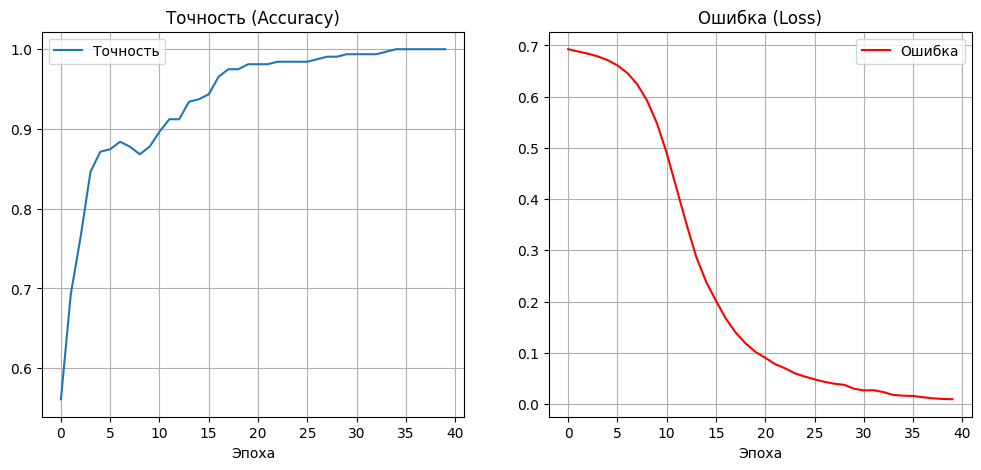

In [37]:
plt.figure(figsize=(12, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность')
plt.title('Точность (Accuracy)')
plt.xlabel('Эпоха')
plt.legend()
plt.grid(True)

# График ошибки
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Ошибка', color='red')
plt.title('Ошибка (Loss)')
plt.xlabel('Эпоха')
plt.legend()
plt.grid(True)

plt.show()

In [42]:
def predict_mood(text):
    t = text.lower()
    data = tokenizer.texts_to_sequences([t])
    data_pad = pad_sequences(data, maxlen=max_text_len)

    res = model.predict(data_pad, verbose=0)
    prediction = np.argmax(res)

    mood = "Позитив (Optimistic)" if prediction == 0 else "Негатив (Pessimistic)"
    print(f"Фраза: '{text}' -> {mood}")

print("--- ПРОВЕРКА РАБОТЫ ---")
predict_mood("Я уверен, что у меня все получится")
predict_mood("Все идет плохо и надежды нет")
predict_mood("Меня никто не понимает и не ценит")
predict_mood("Я люблю себя")

--- ПРОВЕРКА РАБОТЫ ---
Фраза: 'Я уверен, что у меня все получится' -> Позитив (Optimistic)
Фраза: 'Все идет плохо и надежды нет' -> Негатив (Pessimistic)
Фраза: 'Меня никто не понимает и не ценит' -> Негатив (Pessimistic)
Фраза: 'Я люблю себя' -> Позитив (Optimistic)
